# Image Simulation

This example demonstrates how to simulate the image formation process through an optical system, accounting for:

1.  **Spatially Variable Blur**: Using EigenPSF decomposition to model PSF variation across the field.
2.  **Geometric Distortion**: Warping the image based on the lens distortion map.
3.  **Lateral Color**: Simulating wavelength-dependent magnification/distortion (if multi-wavelength).

We will use the `ImageSimulationEngine` class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from optiland.samples.objectives import ReverseTelephoto
from optiland.analysis.image_simulation import ImageSimulationEngine

## 1. Lens Loading

We load a standard `ReverseTelephoto` lens, which has significant distortion and field-dependent aberrations.

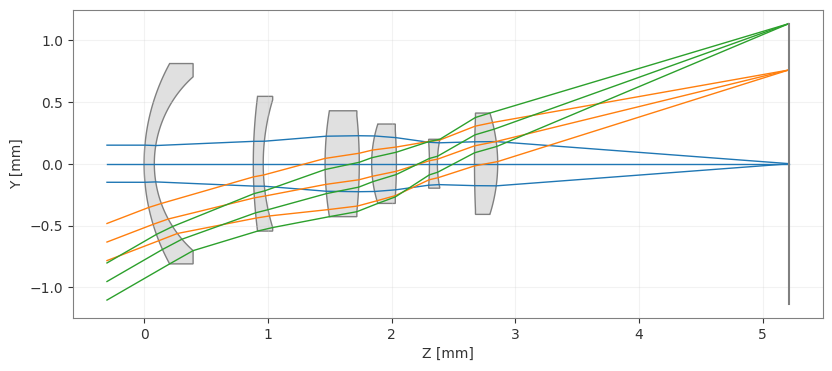

In [2]:
optic = ReverseTelephoto()
_ = optic.draw()

## 2. Select Source Image

Note that the chosen image is based on `HopemanMemorialCarillonRecitalSeries2018.jpg` by DanielPenfield, used under CC BY-SA 4.0. Simulated images derived from this source are subject to the same license.

In [ ]:
img_path = 'RushRheesLibrary_800x600.jpg'

## 3. Run Simulation

We configure the `ImageSimulationEngine`.

- **wavelengths**: Wavelengths to simulate (RGB).
- **psf_grid_shape**: Number of field points to sample for EigenPSFs (5x5 is usually sufficient).
- **psf_size**: Pixel size of the computed PSFs.
- **num_rays**: Ray density for PSF calculation (higher = more accurate but slower).


In [4]:
config = {
    "wavelengths": [0.65, 0.55, 0.45],  # RGB Simulation
    "psf_grid_shape": (5, 5),
    "psf_size": 128,
    "num_rays": 64,
    "oversample": 1
}

simulator = ImageSimulationEngine(optic, img_path, config=config)
result = simulator.run()

## 4. View Results

We compare the original and simulated images. A clear blur is visible in the simulated image, indicating the presence of aberrations.

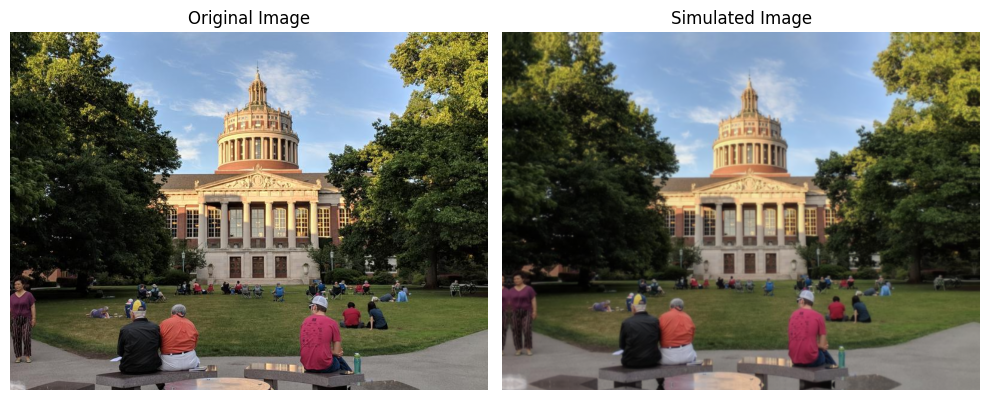

In [5]:
_ = simulator.view()